In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import datasets
from sklearn.svm import SVC


dataset = datasets.load_breast_cancer()

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=14)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
## Initialize and train SVM classifier
svm_classifier = SVC(kernel = 'linear', random_state = 14)
svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("SVM Classifier Performance (Linear Kernel)")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

SVM Classifier Performance (Linear Kernel)
Accuracy: 0.9825
Precision: 0.9733
Recall: 1.0000


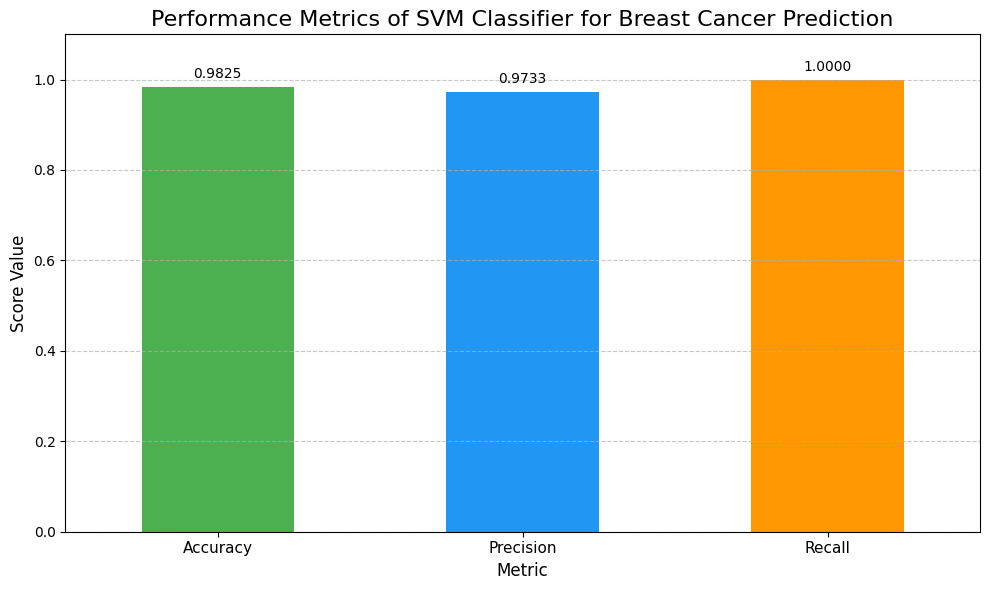

In [ ]:
metrics_data = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
}

metrics_df = pd.Series(metrics_data)

plt.figure(figsize=(10, 6))
# Create a bar plot using the metrics data
metrics_df.plot(
    kind='bar',
    color = ['#4CAF50', '#2196F3', '#FF9800', '#F44336']
)

plt.title('Performance Metrics of SVM Classifier for Breast Cancer Prediction', fontsize=16)
plt.ylabel('Score Value', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.ylim(0.0, 1.1)
plt.xticks(rotation=0, fontsize=11)

for index, value in enumerate(metrics_df):
    plt.text(index, value + 0.02, f'{value:.4f}', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
